# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
import numpy as np
import math
import tensorflow as tf
import os
import pickle
%matplotlib inline
import cv2
import random 
from sklearn.model_selection import train_test_split
from tensorflow.contrib.layers import flatten

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'dataset/train.p'
validation_file= 'dataset/valid.p'
testing_file = 'dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
import pandas as pd 

data_pd = pd.read_csv('dataset/signnames.csv')
print(data_pd)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

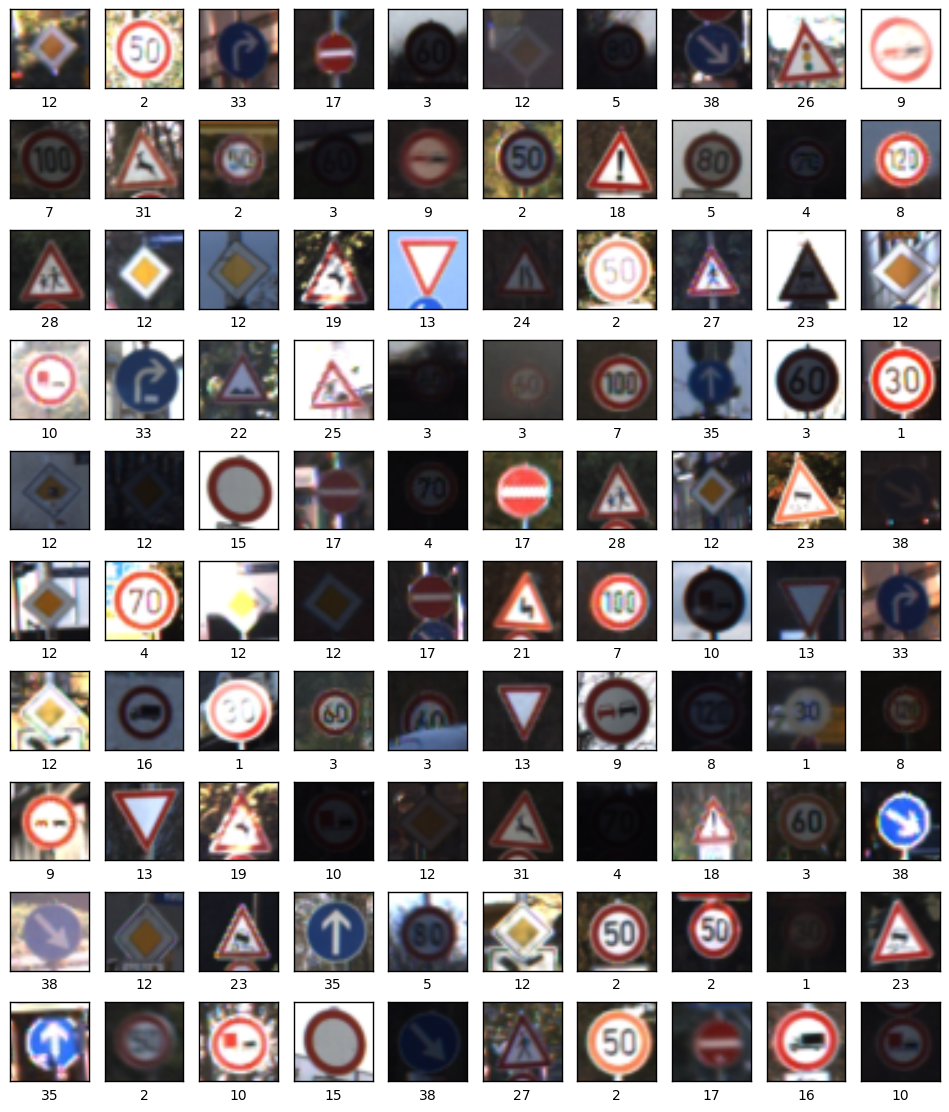

In [4]:
#Display random images with label 

def randomImage(gray = False):
    fig = plt.figure(figsize=(12, 14))
    for i in range (0, 100):
        number = np.random.randint(0, len(X_train))
        axis = fig.add_subplot(10,10,i+1)
        axis.set_xlabel(y_train[number])
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if not gray:
            axis.imshow(X_train[number])
        else:
            axis.imshow(X_train[number], cmap='gray')
    plt.show()       
            
            
randomImage()                    
    

In [5]:
#display dataset 



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Data exploration visualization code goes here.

### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.


#normalization
def Norm(image):
    image = image.astype('float32')
    data = np.mean(image, axis=0)
    target = np.std(image, axis=0)
    output = (image - data) / target
    return output


def rgb2gray(x):
    shape = list(x.shape)
    shape[3] =1
    y = np.ndarray(shape = shape, dtype ='float32')
    for img in np.arange(len(x)):
             y[img,:,:,0] = cv2.cvtColor(x[img], cv2.COLOR_BGR2GRAY)
    return y 


#aFFINE Transform function 
def affine_transform(img):
    rows = 32
    cols =32
# rows, cols = img.shape 
    
    pts1 = np.float32([[5,5], [25,5],[5,25]])
    pts2 = np.float32([[8,8], [22,5],[8,27]])
    
    a = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,a,(cols,rows))
    return dst 


def Perspective_transform(img):
    #img = cv2.imread(img)
    
    rows = 32
    cols =32
    #rows,cols,ch = img.shape
    pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
    pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(cols,rows))
    return dst 
    

#Degree transform Function 
def degree_transform (img, degrees):
    Img_r = rgb2gray(img)

    rows = 32
    cols =32
    #rows, cols = img.shape 
    M = cv2.getRotationMatrix2D((cols/2,rows/2),degrees,1)
    dst =cv2.warpAffine(img,M,(cols,rows))
    return dst 
    

 
                                

Start preprocess


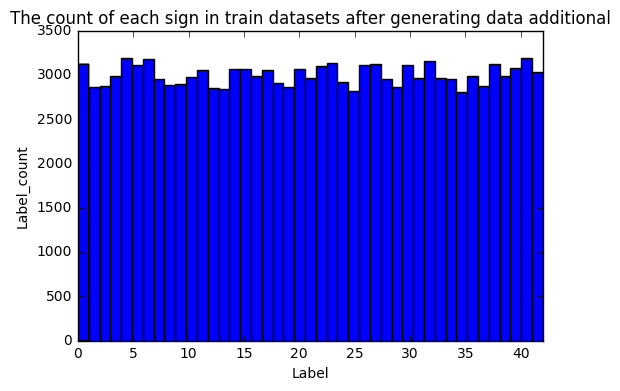

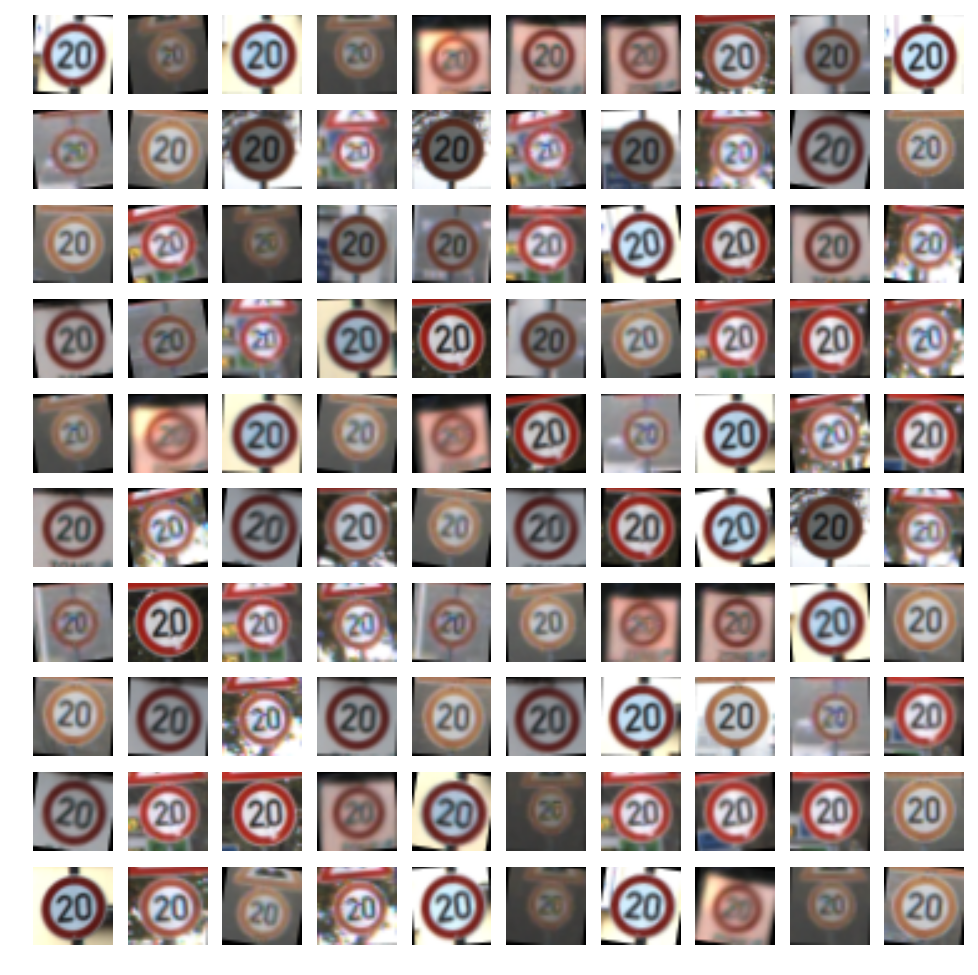

Start data summary
Number of training examples = 103167
Number of validation examples = 25792
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Data summary done
preprocess done


In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.

print("Start preprocess")
#define a min-max scaling function used to normalize the image data
def normalize_inputimage(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )

def transform_image(img,ang_range):
    '''
    1- Image
    2- ang_range: Range of angles for rotation   
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))

    return img

#generate new training data to make the data balance
inputs_per_class = np.bincount(y_train)
# each class will have 2800-3200 training examples 
for i in range(len(inputs_per_class)):
    add_number = 3000 + random.randint(-200, 200) - inputs_per_class[i]
    
    new_features = []
    new_labels = []
    mask = np.where(y_train == i)
    features = X_train[mask]
    for j in range(add_number):
        index = random.randint(0, inputs_per_class[i] - 1)
        new_features.append(transform_image(features[index],20))
        new_labels.append(i)
    X_train = np.append(X_train, new_features, axis=0)
    y_train = np.append(y_train, new_labels, axis=0)
del new_features, new_labels

#plot the count of each sign in train datasets after generating data additiona    
plt.figure(4)
plt.xlabel('Label')
plt.ylabel('Label_count')
plt.axis([0, 42, 0, 3500])
plt.title('The count of each sign in train datasets after generating data additional')
plt.hist(y_train, n_classes)

mask = np.where(y_train == 0)
features = X_train[mask]
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = features[random.randint(0, 2800)]

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

#Normorlization, scale the image data from [0 255] to [0.1 0.9]
X_train = normalize_inputimage(X_train)
X_test = normalize_inputimage(X_test)




# randomly split the original training data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(
   X_train,
   y_train,
   test_size=0.2,
   random_state=36452
)


### To start off let's do a basic data summary.
print("Start data summary")
# TODO: number of training examples
n_train = len(X_train)

# TODO: number of training examples
n_valid = len(X_valid)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape


print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Data summary done")

# One-hot encoded training and validation labels
#oh_y_train = tf.one_hot(y_train, n_classes).eval(session=tf.Session())
#oh_y_train = tf.one_hot(y_valid, n_classes).eval(session=tf.Session())

print('preprocess done')


In [8]:
# random shuffle of data 

#from sklearn.utils import shuffle

#X_train, y_train = shuffle(X_train, y_train)

#X_train.shape

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 128
dropout = 0.5

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x64 Output = 1600.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1600. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [10]:
#x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
#x = tf.placeholder("float32", [None, 32, 32, 3])
#y = tf.placeholder("float32", [None, n_classes])
one_hot_y = tf.one_hot(y, 43)


In [11]:
#Training Pipeline

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
#Model Evaluation
one = 1
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: one})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.



sess = tf.Session()

with sess.as_default():
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './Augmented_lenet.ckpt')
    print("Model saved")





    

Training...

EPOCH 1 ...
Validation Accuracy = 0.900

EPOCH 2 ...
Validation Accuracy = 0.960

EPOCH 3 ...
Validation Accuracy = 0.972

EPOCH 4 ...
Validation Accuracy = 0.983

EPOCH 5 ...
Validation Accuracy = 0.985

EPOCH 6 ...
Validation Accuracy = 0.987

EPOCH 7 ...
Validation Accuracy = 0.990

EPOCH 8 ...
Validation Accuracy = 0.991

EPOCH 9 ...
Validation Accuracy = 0.994

EPOCH 10 ...
Validation Accuracy = 0.992

EPOCH 11 ...
Validation Accuracy = 0.993

EPOCH 12 ...
Validation Accuracy = 0.993

EPOCH 13 ...
Validation Accuracy = 0.993

EPOCH 14 ...
Validation Accuracy = 0.995

EPOCH 15 ...
Validation Accuracy = 0.993

EPOCH 16 ...
Validation Accuracy = 0.992

EPOCH 17 ...
Validation Accuracy = 0.990

EPOCH 18 ...
Validation Accuracy = 0.997

EPOCH 19 ...
Validation Accuracy = 0.995

EPOCH 20 ...
Validation Accuracy = 0.997

EPOCH 21 ...
Validation Accuracy = 0.997

EPOCH 22 ...
Validation Accuracy = 0.995

EPOCH 23 ...
Validation Accuracy = 0.994

EPOCH 24 ...
Validation Accura

In [14]:
sess = tf.Session()

with sess.as_default():
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    testdata = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(testdata))

Test Accuracy = 0.949


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [92]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

dataset = []
size = 32
u = 8
file_path = './10_German_images/'

imageNames = ['No_vehicles.jpg','Yield.jpg', 'Keep_right.jpeg', 'Right-of-way.jpg', 'Turn_right_ahead.jpg', 'caution.jpg','working.jpg','Priority_road.jpg']



### Load and Output the Images

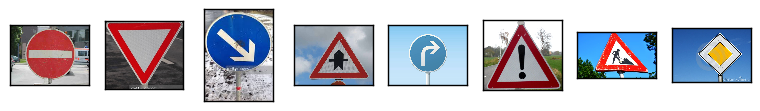

In [93]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
                                
def showTestImages(labels = None):
    fig = plt.figure(figsize=(12, 14))
    for i in range(0, len(imageNames)):
        axis = fig.add_subplot(10,10,i+1)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        
        # Show labels if provided
        if labels is not None:
            axis.set_xlabel(labels[i])
        # Load image from file
        img = mpimg.imread(file_path + imageNames[i])
        # Show it
        axis.imshow(img)

    # Show the plot
    plt.show()

showTestImages()        

### Predict the Sign Type for Each Image

In [94]:
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
# Store the image pixels here

import numpy as np 

#reshape the image 32x32
for load_image in imageNames:
    Online_image = mpimg.imread(file_path + load_image)
    Online_image = cv2.resize(Online_image,(size, size))    
    dataset.append(Online_image)
    
# Store the true classes here
true_classes = np.array([17, 13, 38, 11, 33, 18, 25, 12])


test_dataset = np.array(dataset,dtype=np.float32)

#normalization
test_dataset = Norm(test_dataset)

test_dataset[0].shape

(32, 32, 3)

In [95]:
### Run the predictions here and use the model to output the prediction for each image.
### Feel free to use as many code cells as needed.
import tensorflow as tf

prediction = tf.nn.softmax(logits)
with sess.as_default():
#    sess.run(init)
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))  
    saver.restore(sess, './Augmented_lenet.ckpt')
    result = sess.run(prediction, feed_dict={x: test_dataset, keep_prob: 1.0})
    print('Output prediction', np.argmax(result, axis=1))
    print()
Compare_result = np.argmax(result, axis=1)
#showTestImages(test_dataset)


for i in range(0,len(test_dataset)):
    print("Image {} - Predicted class =  {}, true class = {}".format(i+1, Compare_result[i], true_classes[i]))


Output prediction [17 13 38 11 33 18 25 12]

Image 1 - Predicted class =  17, true class = 17
Image 2 - Predicted class =  13, true class = 13
Image 3 - Predicted class =  38, true class = 38
Image 4 - Predicted class =  11, true class = 11
Image 5 - Predicted class =  33, true class = 33
Image 6 - Predicted class =  18, true class = 18
Image 7 - Predicted class =  25, true class = 25
Image 8 - Predicted class =  12, true class = 12


### Analyze Performance

In [96]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

import csv
k = 8

with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    file_name = dict((rows[0],rows[1]) for rows in reader)   
    
               
value = sess.run(tf.nn.top_k(prediction, k), feed_dict={x: test_dataset, keep_prob: 1.0})
print(value)    


TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   8.48581067e-11,   2.71183222e-13,
          1.17245796e-17,   4.88117430e-27,   4.30914961e-27,
          3.52256021e-33,   1.30139613e-33],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [98]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import csv

k= 8

softmax_prediction = tf.nn.softmax(logits)
with sess.as_default():
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './Augmented_lenet.ckpt')
    
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    file_name = dict((rows[0],rows[1]) for rows in reader)   
    
    out = sess.run(softmax_prediction, feed_dict={x: test_dataset, keep_prob: 1.0})
    soft = tf.nn.top_k(softmax_prediction, k)
    
    value, index = sess.run(soft, feed_dict={x: test_dataset, keep_prob: 1.0})
    
for i in range (len(value)):
    print()
    print("top 10 softmax probabilities for the predictions ")
    for j in range(8):
        print("Result : {}  ===> {:.2f}%".format(file_name[str(index[i,j])], value[i,j] * 100,))
        
        


top 10 softmax probabilities for the predictions 
Result : No entry  ===> 100.00%
Result : Speed limit (20km/h)  ===> 0.00%
Result : Speed limit (30km/h)  ===> 0.00%
Result : Speed limit (50km/h)  ===> 0.00%
Result : Speed limit (60km/h)  ===> 0.00%
Result : Speed limit (70km/h)  ===> 0.00%
Result : Speed limit (80km/h)  ===> 0.00%
Result : End of speed limit (80km/h)  ===> 0.00%

top 10 softmax probabilities for the predictions 
Result : Yield  ===> 100.00%
Result : Speed limit (20km/h)  ===> 0.00%
Result : Speed limit (30km/h)  ===> 0.00%
Result : Speed limit (50km/h)  ===> 0.00%
Result : Speed limit (60km/h)  ===> 0.00%
Result : Speed limit (70km/h)  ===> 0.00%
Result : Speed limit (80km/h)  ===> 0.00%
Result : End of speed limit (80km/h)  ===> 0.00%

top 10 softmax probabilities for the predictions 
Result : Keep right  ===> 100.00%
Result : Speed limit (20km/h)  ===> 0.00%
Result : Speed limit (30km/h)  ===> 0.00%
Result : Speed limit (50km/h)  ===> 0.00%
Result : Speed limit (60

**Answer:**

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 